# Chi-Squared Distribution Overview

A standard normal variable, \( Z \sim N(0,1) \), when squared gives:
$$
Z^2 \sim \chi^2_{1}.
$$

More generally, if \( Z_1, Z_2, \dots, Z_k \) are independent standard normals, then:
$$
\sum_{i=1}^{k} Z_i^2 \sim \chi^2_{k},
$$
which defines the chi-squared distribution with \( k \) degrees of freedom.

**Key Properties:**
- **Non-Negative:** \( \chi^2 \) values are always \( \geq 0 \).
- **Right-Skewed:** The distribution is skewed to the right (especially for small \( k \)).
- **Mean:** $$ E[\chi^2_k] = k. $$
- **Variance:** $$ \operatorname{Var}(\chi^2_k) = 2k. $$


Max Z value: 3.9262377064363267
Min Z value: -3.9224002516183423
Max Z-squared value: 15.415342527442387
Min Z-squared value: 4.287588034796917e-08


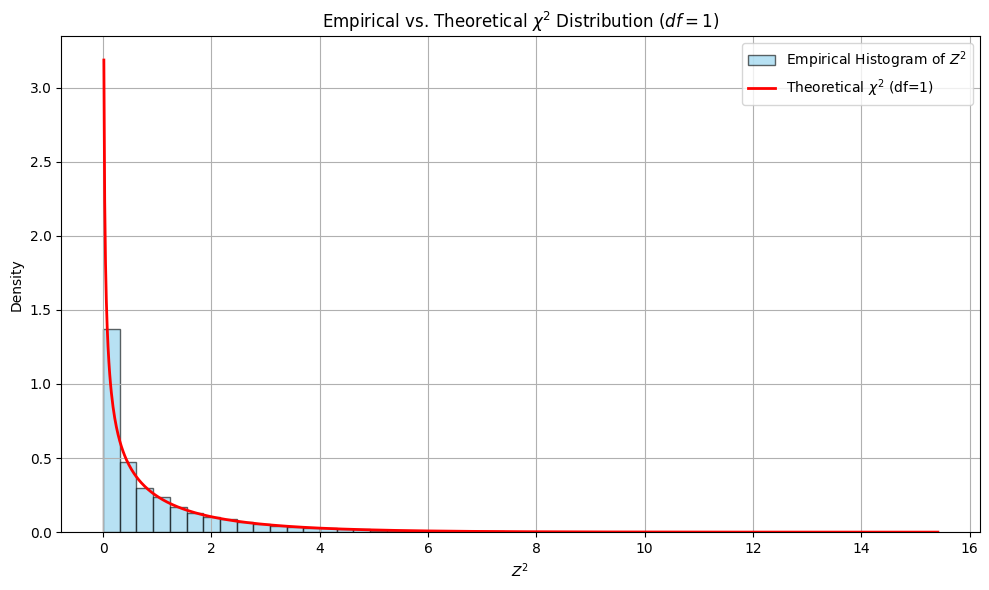

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

# Set a random seed for reproducibility
np.random.seed(42)

# Number of samples to generate
n_samples = 10000

# Generate Z values from a standard normal distribution: Z ~ N(0,1)
z = np.random.normal(0, 1, n_samples)
print(f"Max Z value: {np.max(z)}")
print(f"Min Z value: {np.min(z)}")

# Compute Z^2 for each sample
z_squared = z ** 2
print(f"Max Z-squared value: {np.max(z_squared)}")
print(f"Min Z-squared value: {np.min(z_squared)}")

# Create an x-grid covering the range of Z^2 values for plotting the theoretical PDF
x_vals = np.linspace(0, np.max(z_squared), 1000)

# Compute the theoretical chi-squared PDF with 1 degree of freedom
chi2_pdf = stats.chi2.pdf(x_vals, df=1)

# Plot the empirical histogram of Z^2
plt.figure(figsize=(10, 6))
plt.hist(z_squared, bins=50, density=True, alpha=0.6,
         color='skyblue', edgecolor='black', label=r'Empirical Histogram of $Z^2$')

# Overlay the theoretical chi-squared distribution curve
plt.plot(x_vals, chi2_pdf, 'r-', lw=2, label=r'Theoretical $\chi^2$ (df=1)')

# Set plot labels and title
plt.xlabel(r"$Z^2$")
plt.ylabel("Density")
plt.title(r"Empirical vs. Theoretical $\chi^2$ Distribution ($df=1$)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


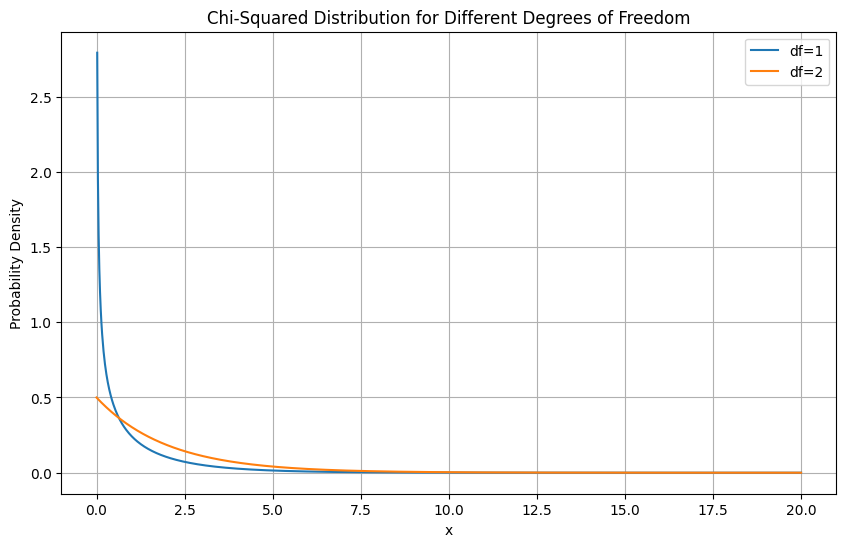

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

# Define degrees of freedom
df_values = [1, 2]  # Varying df to see the effect
x = np.linspace(0, 20, 1000)  # Range of x values

# Plot chi-squared distributions for different df
plt.figure(figsize=(10, 6))

for df in df_values:
    plt.plot(x, stats.chi2.pdf(x, df), label=f"df={df}")

plt.xlabel("x")
plt.ylabel("Probability Density")
plt.title("Chi-Squared Distribution for Different Degrees of Freedom")
plt.legend()
plt.grid()
plt.show()


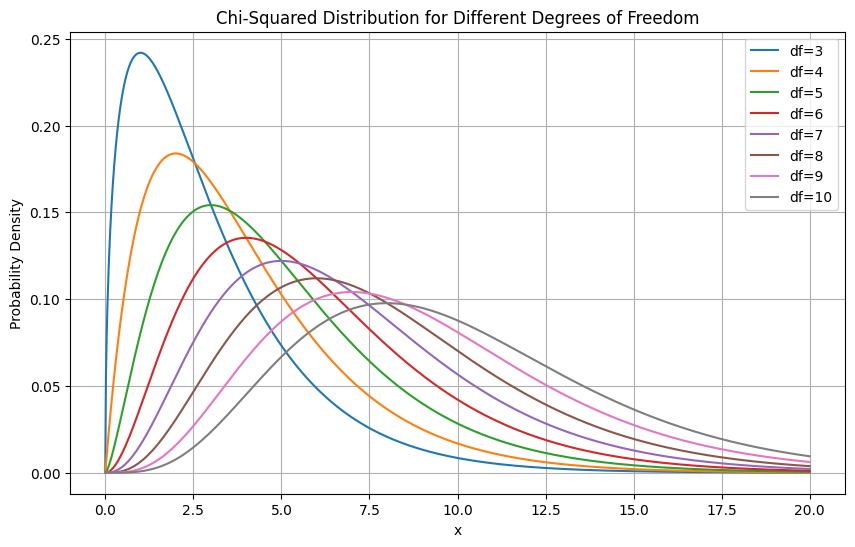

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

# Define degrees of freedom
df_values = [3, 4, 5, 6, 7, 8, 9, 10]  # Varying df to see the effect
x = np.linspace(0, 20, 1000)  # Range of x values

# Plot chi-squared distributions for different df
plt.figure(figsize=(10, 6))

for df in df_values:
    plt.plot(x, stats.chi2.pdf(x, df), label=f"df={df}")

plt.xlabel("x")
plt.ylabel("Probability Density")
plt.title("Chi-Squared Distribution for Different Degrees of Freedom")
plt.legend()
plt.grid()
plt.show()


# Non-Central vs. Central Chi-Squared Distributions

If \( Z_1, Z_2, \dots, Z_k \) are independent standard normal random variables, then
$$
Z_i \sim N(0,1).
$$

The sum of their squares is given by:
$$
\chi^2_k = \sum_{i=1}^k Z_i^2,
$$
which follows the **central chi-squared distribution** with \( k \) degrees of freedom.

On the other hand, if we have independent normal variables with nonzero means:
$$
X_i \sim N(\mu_i,1),
$$
then the sum
$$
\sum_{i=1}^k X_i^2
$$
follows a **non-central chi-squared distribution** with \( k \) degrees of freedom and non-centrality parameter
$$
\lambda = \sum_{i=1}^k \mu_i^2.
$$
This is denoted as:
$$
\chi'^2_k(\lambda).
$$

Notably, when the non-centrality parameter \(\lambda = 0\), the non-central chi-squared distribution reduces to the central chi-squared distribution:
$$
\chi'^2_k(0) = \chi^2_k.
$$


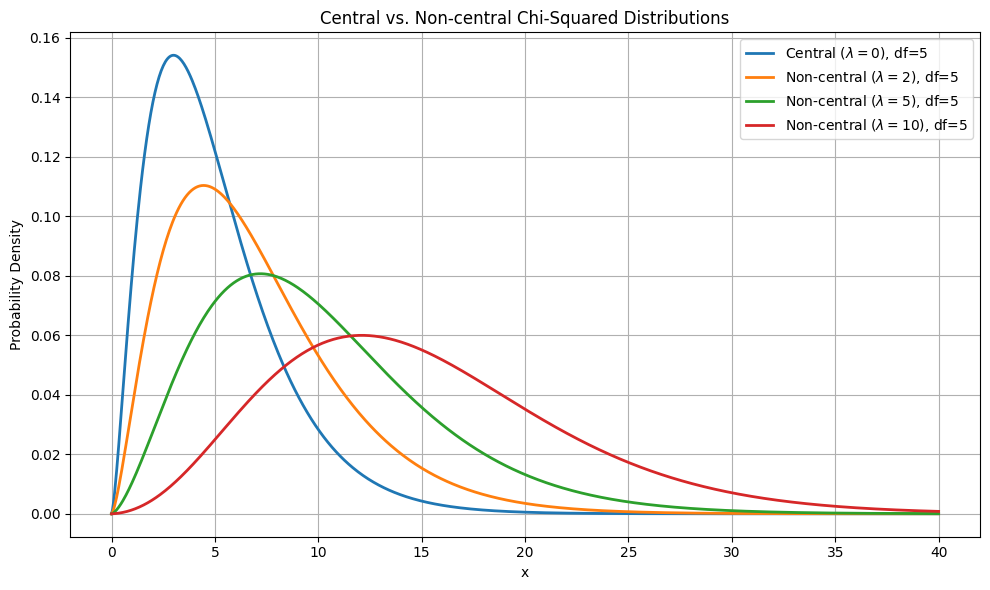

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

# Parameters for the chi-squared distributions
df = 5                        # degrees of freedom
nc_params = [0, 2, 5, 10]       # non-centrality parameters
# Note: nc=0 corresponds to the central chi-squared distribution

# Create an array of x values for plotting the PDF
x_vals = np.linspace(0, 40, 800)

plt.figure(figsize=(10, 6))

# Plot for each non-centrality parameter
for nc in nc_params:
    if nc == 0:
        # Central chi-squared distribution
        pdf_vals = stats.chi2.pdf(x_vals, df)
        label_str = f'Central ($\\lambda=0$), df={df}'
    else:
        # Non-central chi-squared distribution
        pdf_vals = stats.ncx2.pdf(x_vals, df, nc)
        label_str = f'Non-central ($\\lambda={nc}$), df={df}'
    
    plt.plot(x_vals, pdf_vals, lw=2, label=label_str)

plt.xlabel('x')
plt.ylabel('Probability Density')
plt.title('Central vs. Non-central Chi-Squared Distributions')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


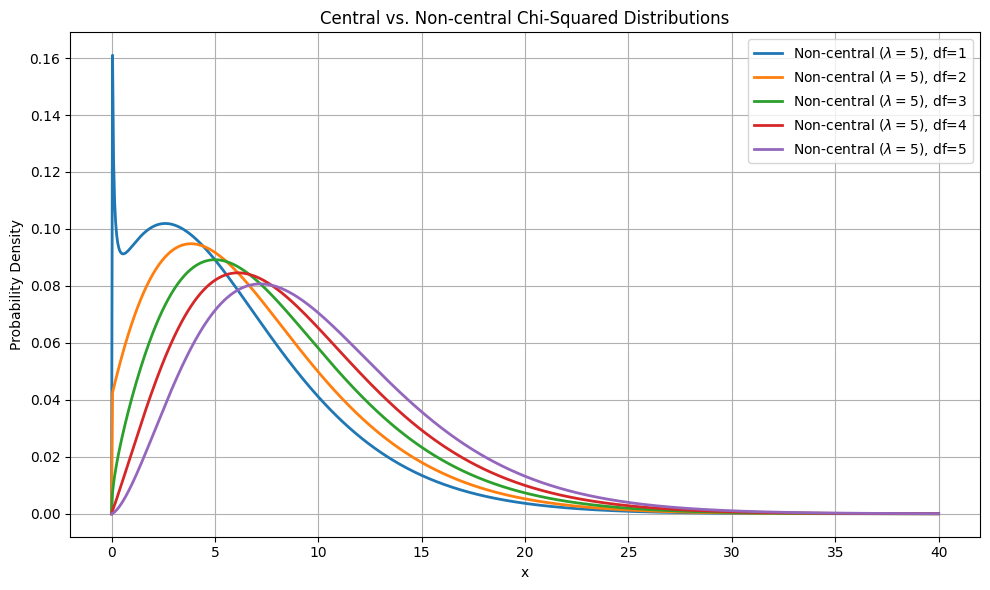

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

# Parameters for the chi-squared distributions
df = [1,2,3,4,5]                        # degrees of freedom
nc_params = 5       # non-centrality parameters
# Note: nc=0 corresponds to the central chi-squared distribution

# Create an array of x values for plotting the PDF
x_vals = np.linspace(0, 40, 800)

plt.figure(figsize=(10, 6))

# Plot for each non-centrality parameter
for d in df:
    # Non-central chi-squared distribution
    pdf_vals = stats.ncx2.pdf(x_vals, d, nc_params)
    label_str = f'Non-central ($\\lambda={nc_params}$), df={d}'
    
    plt.plot(x_vals, pdf_vals, lw=2, label=label_str)

plt.xlabel('x')
plt.ylabel('Probability Density')
plt.title('Central vs. Non-central Chi-Squared Distributions')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


$$ 
\textbf{Effect of Both  } \lambda \textbf{  and df paramters on the distribution to Chi-squared} 
$$

$$
\textbf{Degrees-of-Freedom (df):}
$$

$$
\textbf{Interpretation:} \quad \text{The degrees-of-freedom represent the number of independent squared normal random variables being summed. For } \lambda = 0, \text{ a larger } df \text{ means more terms are summed.}
$$

$$
\textbf{Effect on the Shape:}
$$

$$
\begin{array}{rcl}
\text{- Low } df \, (\text{e.g., } 2 \text{ or } 3) & : & \text{The distribution is highly skewed with most probability mass near 0 and a long right tail.} \\
\text{- High } df & : & \text{The distribution becomes more symmetric, approximating a normal distribution (by the CLT), with the mode shifting away from 0.}
\end{array}
$$

$$
\textbf{Significance in Applications:} \quad \text{For example, in the Heston model, } df = \frac{4\kappa\theta}{\sigma^2} \text{ defines how “peaky” or spread out the distribution is.}
$$

$$
\textbf{Noncentrality Parameter } (\lambda):
$$

$$
\textbf{Interpretation:} \quad \lambda \text{ arises when the underlying normals have nonzero means, effectively measuring the amount of deterministic shift; typically, } \lambda = \sum \mu_i^2.
$$

$$
\textbf{Effect on the Shape:} 
$$

$$
\lambda = 0 \Rightarrow \text{Central chi-squared distribution.}
$$

$$
\text{For } \lambda > 0:
$$

$$
\begin{array}{rcl}
\text{Mean} & = & df + \lambda, \\
\text{Variance} & = & 2(df + 2\lambda), \\
\text{Mode} & \text{shifts right, and the overall density} & \text{flattens in the lower region.}
\end{array}
$$

$$
\textbf{Significance in Applications:} \quad \text{In the Heston model, for instance, } \lambda = \frac{4\kappa e^{-\kappa \Delta t}\, v(t)}{\sigma^2(1-e^{-\kappa \Delta t})} \text{ reflects how the current variance shifts the distribution at the next time step.}
$$

$$
\textbf{Visual Summary:}
$$

$$
\begin{array}{ll}
\text{Low } df \text{ and low } \lambda & : \text{Highly skewed, peak near 0.} \\
\text{Low } df \text{ and high } \lambda & : \text{Skew with the peak shifted right and a longer tail.} \\
\text{High } df \text{ and low } \lambda & : \text{More symmetric (normal-like).} \\
\text{High } df \text{ and high } \lambda & : \text{Wider distribution, increased mean/variance, reduced skewness.}
\end{array}
$$

$$
\textbf{Probability Density Function (pdf):}
$$

$$
f_X(x) = \frac{1}{2} e^{-(x+\lambda)/2} \left(\frac{x}{\lambda}\right)^{\frac{df}{4} - \frac{1}{2}} I_{\frac{df}{2}-1}\!\left(\sqrt{\lambda x}\right), \quad x \ge 0,
$$

$$
\text{where } I_{\nu} \text{ is the modified Bessel function of the first kind.}
$$

$$
\textbf{Final Thoughts:} \quad df \text{ establishes the baseline shape, while } \lambda \text{ shifts and scales it based on the nonzero means.}
$$


<>:19: SyntaxWarning: invalid escape sequence '\l'
<>:19: SyntaxWarning: invalid escape sequence '\l'
/var/folders/n8/19ypk1rs6tdbh7vcb43bfl0c0000gn/T/ipykernel_2073/1019024122.py:19: SyntaxWarning: invalid escape sequence '\l'
  plt.title(f'Effect of $\lambda$ (df = {df_fixed})')


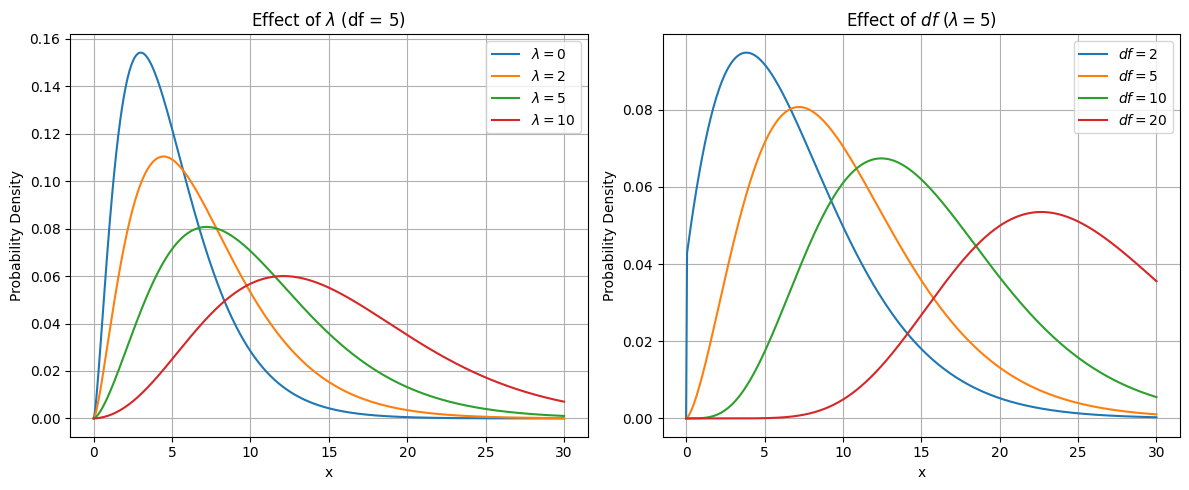

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import ncx2

# Create a grid for x values where the pdf is evaluated
x = np.linspace(0, 30, 500)

# -------------------------------
# Plot 1: Varying lambda with fixed df
# -------------------------------
df_fixed = 5
lambdas = [0, 2, 5, 10]

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
for lam in lambdas:
    pdf_vals = ncx2.pdf(x, df_fixed, lam)
    plt.plot(x, pdf_vals, label=r'$\lambda=$' + str(lam))
plt.title(f'Effect of $\lambda$ (df = {df_fixed})')
plt.xlabel('x')
plt.ylabel('Probability Density')
plt.legend()
plt.grid(True)

# -------------------------------
# Plot 2: Varying degrees-of-freedom with fixed lambda
# -------------------------------
lambda_fixed = 5
dfs = [2, 5, 10, 20]

plt.subplot(1, 2, 2)
for df_val in dfs:
    pdf_vals = ncx2.pdf(x, df_val, lambda_fixed)
    plt.plot(x, pdf_vals, label=r'$df=$' + str(df_val))
plt.title(r'Effect of $df$ ($\lambda = 5$)')
plt.xlabel('x')
plt.ylabel('Probability Density')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()


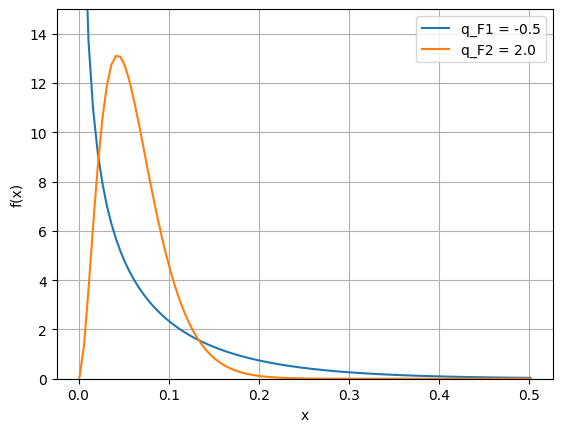

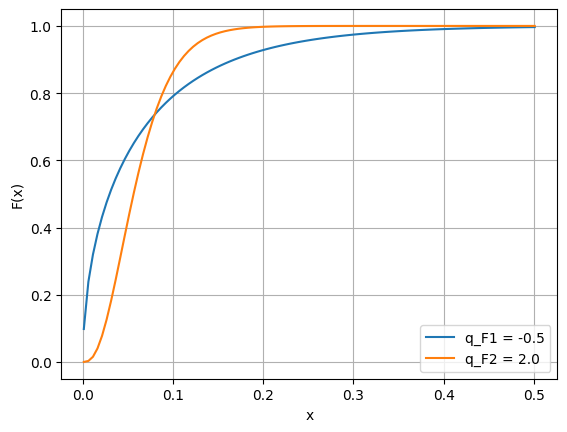

In [7]:
#%%
"""
CIR distribution
"""
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as st

# Global variables 

s = 0
t = 5
x = np.linspace(0.001,0.501,100)

# Feller condition

def FellerCondition(kappa,v_bar,gamma):
    q_F = 2.0*kappa*v_bar/np.power(gamma,2.0)-1.0
    return q_F
        
# PDF and CDF for CIR process

def CIR_PDF_CDF(x,gamma,kappa,t,s,v_bar,v_s):    
    c_s_t      = np.power(gamma,2.0) / (4.0*kappa) * (1.0-np.exp(-kappa*(t-s)));
    d          = 4.0 * kappa * v_bar / np.power(gamma,2.0);
    lambda_s_t = 4.0 * kappa * np.exp(-kappa * (t-s)) / (np.power(gamma,2.0) * (1.0 - np.exp(-kappa * (t-s)))) * v_s;
    f_X        = 1.0 / c_s_t * st.ncx2.pdf(x/c_s_t,d,lambda_s_t);
    F_X        = st.ncx2.cdf(x/c_s_t,d,lambda_s_t);
    output = {"pdf":f_X, "cdf":F_X}    
    return output

def Analysis():

    # Feller condition satisfied

    gamma = 0.316
    kappa = 0.5
    v_s   = 0.2
    v_bar = 0.05
    q_F1 = FellerCondition(kappa,v_bar,gamma)
    output_case1 = CIR_PDF_CDF(x,gamma,kappa,t,s,v_bar,v_s)
    
    # Feller condition not satisfied

    gamma    = 0.129
    kappa    = 0.5
    v_s      = 0.2
    v_bar    = 0.05
    q_F2 = FellerCondition(kappa,v_bar,gamma)
    output_case2 = CIR_PDF_CDF(x,gamma,kappa,t,s,v_bar,v_s)
    
    # Generate output plots

    plt.figure(1)
    plt.plot(x,output_case1["pdf"], label = "q_F1 = " + str(np.round(q_F1,2)))
    plt.plot(x,output_case2["pdf"], label = "q_F2 = " + str(np.round(q_F2,2)))   
    plt.grid()
    plt.xlabel("x")
    plt.ylabel("f(x)")
    plt.ylim([0,15])
    plt.legend()
    plt.figure(2)
    plt.plot(x,output_case1["cdf"], label = "q_F1 = " + str(np.round(q_F1,2)))
    plt.plot(x,output_case2["cdf"], label = "q_F2 = " + str(np.round(q_F2,2)))   
    plt.grid()
    plt.xlabel("x")
    plt.ylabel("F(x)")
    plt.legend()

Analysis()